## Test and show fingerprint (SOCOFing fingerprint dataset)

<PIL.BmpImagePlugin.BmpImageFile image mode=RGBA size=96x103 at 0x7F6B0BC27220>


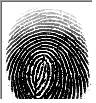

tensor([[[160, 160, 160,  ...,   0,   0,   0],
         [160, 105, 105,  ...,   0,   0,   0],
         [160, 105, 255,  ...,   0,   0,   0],
         ...,
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]],

        [[160, 160, 160,  ...,   0,   0,   0],
         [160, 105, 105,  ...,   0,   0,   0],
         [160, 105, 255,  ...,   0,   0,   0],
         ...,
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]],

        [[160, 160, 160,  ...,   0,   0,   0],
         [160, 105, 105,  ...,   0,   0,   0],
         [160, 105, 255,  ...,   0,   0,   0],
         ...,
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]],

        [[255, 255, 255,  ...,   0,   0,   0],
         [255, 255, 255,  ...,   0,   0,   0],
         [25

In [57]:
# Import necessary libraries
import os
import torch
from PIL import Image
import torchvision.transforms as transforms
    
    
# define image path
img_dir = os.path.join("..", "kaggle_fingerprint", "SOCOFing", "Real")
img_path = os.path.join(img_dir, "1__M_Left_index_finger.BMP")

# Read a PIL image
image = Image.open(img_path)
print(image)
# show pic
image.show()
  
# Define a transform to convert PIL 
# image to a Torch tensor
transform = transforms.Compose([
    transforms.PILToTensor()
])
  
# transform = transforms.PILToTensor()
# Convert the PIL image to Torch tensor
img_tensor = transform(image)
  
# print the converted Torch tensor
print(img_tensor)
print(img_tensor.shape)

## Rename image name and integrate together into one folder (All/)
* because I wanna put all images into one single folder (All/)

In [85]:
import os

# change every files under certain folder postfix
def change_file_postfix(folder_path, postfix):
    # 获取文件夹中的文件列表
    files = os.listdir(folder_path)
    for file in files:
        old_path = os.path.join(folder_path, file)
        filename, extension = os.path.splitext(file)
        filename += "_" + postfix
        new_path = os.path.join(folder_path, filename + extension)
        os.rename(old_path, new_path)
#         print(f'old_path: {old_path}, new_path: {new_path}')
#         break

folder_path = os.path.join("SOCOFing", "Altered", "Altered-Hard")  
new_postfix = 'AlteredHard'
change_file_postfix(folder_path, new_postfix)



## Modify identity by minus 1 (range will be 0~599)
* because loss function need label range between 0~n-1
* hence the filename also needs to be modified as well

In [92]:
import re
import os

folder_path = os.path.join("SOCOFing", "All")

# 讀取檔案列表
files = os.listdir(folder_path)
print(f'Initial file size: {len(files)}')

# 定義排序函式
def sort_by_number(filename):
    # 使用正則表達式提取檔案名中的數字部分
    match = re.search(r"(\d+)", filename)
    if match:
        return int(match.group(0))  # 返回數字部分作為排序依據
    else:
        return 0  # 如果檔案名中沒有數字，將其視為0

# 按照數字大小進行排序
sorted_files = sorted(files, key=sort_by_number)

# 依序讀取檔案
for filename in sorted_files:
    person = re.match(r"(\d+)", filename)
    new_id = int(person.group(0)) - 1
    new_file = re.sub(r"\d+", str(new_id), filename)
    old_path = os.path.join(folder_path, filename)
    new_path = os.path.join(folder_path, new_file)
    #print(old_path)
    #print(new_path)
    os.rename(old_path, new_path)
    
print(f'After file size: {len(os.listdir(folder_path))}')


Initial file size: 55270
After file size: 55270


## Combine each path of fingerprint with label in .csv file

In [93]:
import os, re, csv

img_dir = os.path.join("SOCOFing", "All") # define image path
data_list = [["img_path", "label"]] # for csv file annotations

def combine_imgPath_and_label(img_dir):
    for root, dirs, files in os.walk(img_dir):
#         print(f'root: {root}, dirs: {dirs}, files: {files}')
#         print(f'files size: {len(files)}')
        for file_name in files:
            data = []
            person = re.match(r"(\d+)", file_name)
            data.append(file_name)
            data.append(person.group(0))
            data_list.append(data)
    print(f'Total dataset size: {len(data_list)-1}') # minus the header name 

combine_imgPath_and_label(img_dir)

# creat a csv file and store the image path and label
with open("./kaggle_fingerprint_annotations.csv", "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerows(data_list)

Total dataset size: 55270


## Creat kaggle fingerprint dataset class


## seperate training and validation and testing sets (80:10:10)

In [5]:
# seperate training and validation sets (80:20)
# SOCOFing fingerprint All/
import os, re, csv

folder_path = os.path.join("SOCOFing", "All")
testing_split = 1
validation_split = 1
training_split = 8
training_list = [["img_path", "label"]]
validation_list = [["img_path", "label"]]
testing_list = [["img_path", "label"]]

# 定義排序函式
def sort_by_number(filename):
    # 使用正則表達式提取檔案名中的數字部分
    match = re.search(r"(\d+)", filename)
    if match:
        return int(match.group(0))  # 返回數字部分作為排序依據
    else:
        return 0  # 如果檔案名中沒有數字，將其視為0

def combine_imgPath_and_label(img_list):
    for i, img in enumerate(img_list):
        train_data = []
        valid_data = []
        test_data = []
        person = re.match(r"(\d+)", img)
        if "CR" in img:
            continue
        if i % (training_split+validation_split+testing_split) < training_split:
            train_data.append(img)
            train_data.append(int(person.group(0)))
            training_list.append(train_data)
        elif i % (validation_split + testing_split) < validation_split:
            valid_data.append(img)
            valid_data.append(int(person.group(0)))
            validation_list.append(valid_data)
        else:
            test_data.append(img)
            test_data.append(int(person.group(0)))
            testing_list.append(test_data)
            
    print(f'Total training data size: {len(training_list)-1}') # minus the header name 
    print(f'Total validation data size: {len(validation_list)-1}')
    print(f'Total testing data size: {len(testing_list)-1}')

files = os.listdir(folder_path)
sorted_files = sorted(files, key=sort_by_number) # 按照數字大小進行排序   
combine_imgPath_and_label(sorted_files)
# for i in range(100):
#     print(training_list[i])
#     print(validation_list[i])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


AttributeError: 'NoneType' object has no attribute 'group'

In [9]:
# creat a csv file and store the image path and label
def store_path_label_csv(annotations_file, data_list):
    with open(annotations_file, "w", newline="", encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerows(data_list)
    print(f'{annotations_file} saved')

training_annotations_file = "kaggle_training_fingerprint_annotations.csv"
validation_annotations_file = "kaggle_validation_fingerprint_annotations.csv"
testing_annotations_file = "kaggle_testing_fingerprint_annotations.csv"
store_path_label_csv(extracted_training_annotations_file, training_list)
store_path_label_csv(extracted_validaltion_annotations_file, validation_list)
store_path_label_csv(extracted_testing_annotations_file, testing_list)

kaggle_training_fingerprint_annotations.csv saved
kaggle_validation_fingerprint_annotations.csv saved
kaggle_testing_fingerprint_annotations.csv saved


In [58]:
# 2023-3-12 custom dataset created by Allen LIN
from PIL import Image
import pandas as pd
import os
from scipy.io import loadmat
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
from torchvision import transforms
import numpy as np
import cv2
import torch

class fingerprintDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.targets = self.img_labels.iloc[:, 1] # label of the dataset
        self.target_transform = target_transform
#         img_path = os.path.join(self.img_dir, self.img_labels.iloc[0, 0])
#         image = cv2.imread(img_path)
#         self.data = np.empty((len(self.img_labels), *image.shape), dtype=np.uint8)
#         for i in range(len(self.img_labels)):
#             self.data[i] = image
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = cv2.imread(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
    def __len__(self):
        return len(self.img_labels)